Дятлов Максим Сергеевич ТРПО24-1 Практическая работа по предмету практикум по программированию №2

# <font color='CadetBlue'> **ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ (1 курс)**

## <font color='CadetBlue'> **ВТОРОЙ СЕМЕСТР**

### <font color='CadetBlue'> **II** —  апрель, май

#### <font color='LightCoral'> **ЗАДАНИЕ 2.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

Суммарная сложность дополнительных заданий должна быть не менее 5.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from typing import Iterator, Tuple, List, Callable
from itertools import islice
import itertools
from math import sin, cos, pi
from matplotlib.patches import Polygon
from matplotlib.path import Path
from itertools import count, cycle, islice
from functools import wraps
from functools import reduce

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

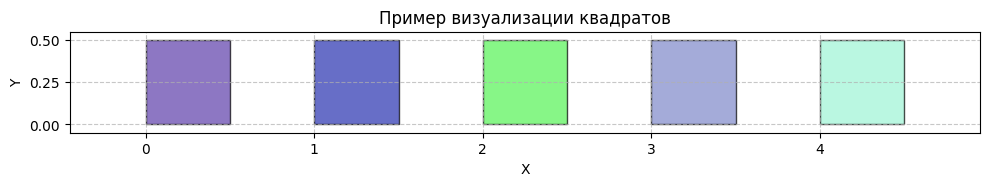

In [2]:
Point = Tuple[float, float]
Polygon = Tuple[Point, ...]
PolygonSequence = Iterator[Polygon]

def visualize_polygons(polygons: PolygonSequence, n: int = 10, figsize: Tuple[int, int] = (10, 8),
                      title: str = "Визуализация полигонов", colors: List[str] = None) -> None:
    """
    Визуализирует последовательность полигонов.

    Args:
        polygons: Итератор полигонов, где каждый полигон представлен кортежем точек
        n: Количество полигонов для визуализации (по умолчанию 10)
        figsize: Размер фигуры (по умолчанию 10x8)
        title: Заголовок графика
        colors: Список цветов для полигонов (если None, будут использованы случайные цвета)
    """
    fig, ax = plt.subplots(figsize=figsize)

    polygon_list = list(islice(polygons, n))

    if colors is None:
        colors = [np.random.rand(3,) for _ in range(len(polygon_list))]
    elif len(colors) < len(polygon_list):
        colors.extend([np.random.rand(3,) for _ in range(len(polygon_list) - len(colors))])

    all_points = [point for polygon in polygon_list for point in polygon]
    if all_points:
        x_coords = [p[0] for p in all_points]
        y_coords = [p[1] for p in all_points]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)

        x_padding = (x_max - x_min) * 0.1
        y_padding = (y_max - y_min) * 0.1

        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)

    for i, polygon in enumerate(polygon_list):
        poly_path = patches.Polygon(polygon, closed=True,
                                   facecolor=colors[i],
                                   edgecolor='black',
                                   alpha=0.7)
        ax.add_patch(poly_path)

    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    def gen_squares(start_x=0, start_y=0, step=1):
        x, y = start_x, start_y
        size = 0.5
        while True:
            yield ((x, y), (x + size, y), (x + size, y + size), (x, y + size))
            x += step

    visualize_polygons(gen_squares(), n=5, title="Пример визуализации квадратов")

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


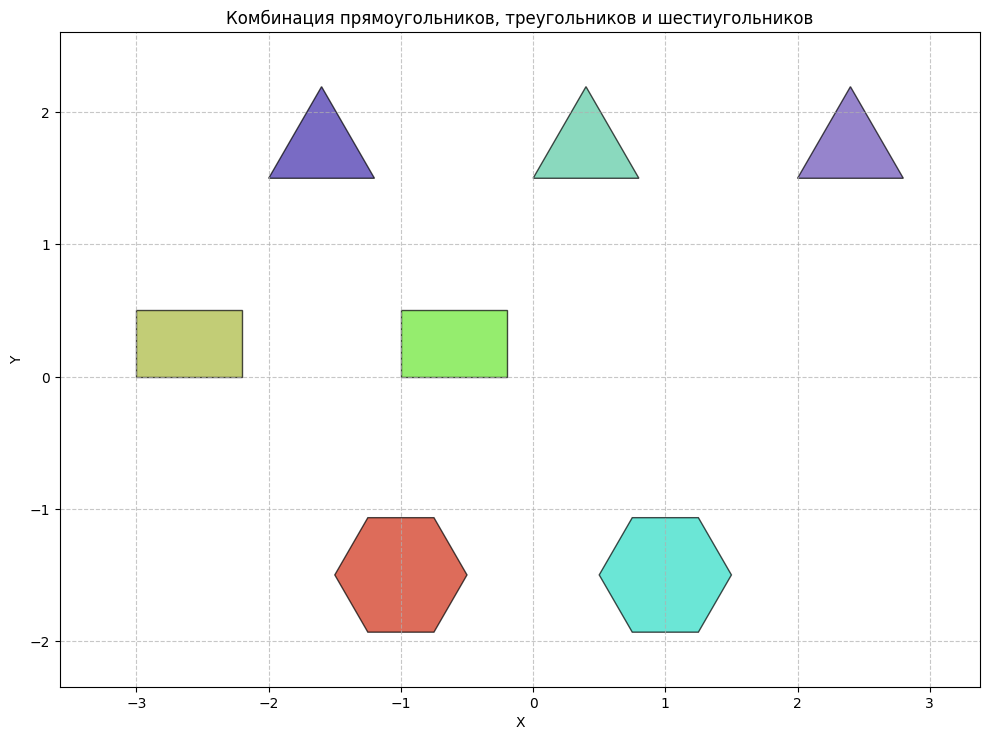

In [3]:
def gen_rectangle(start_x=0, start_y=0, width=1, height=0.5, step=1.5):
    """
    Генерирует бесконечную последовательность непересекающихся прямоугольников.

    Args:
        start_x (float): Начальная координата x
        start_y (float): Начальная координата y
        width (float): Ширина прямоугольника
        height (float): Высота прямоугольника
        step (float): Шаг между прямоугольниками

    Yields:
        tuple: Координаты вершин прямоугольника
    """
    x, y = start_x, start_y
    while True:
        yield ((x, y), (x + width, y), (x + width, y + height), (x, y + height))
        x += step

def gen_triangle(start_x=0, start_y=0, side=1, step=1.5):
    """
    Генерирует бесконечную последовательность непересекающихся треугольников.

    Args:
        start_x (float): Начальная координата x
        start_y (float): Начальная координата y
        side (float): Длина стороны треугольника
        step (float): Шаг между треугольниками

    Yields:
        tuple: Координаты вершин треугольника
    """
    x, y = start_x, start_y
    height = side * np.sqrt(3) / 2
    while True:
        yield ((x, y), (x + side, y), (x + side/2, y + height))
        x += step

def gen_hexagon(start_x=0, start_y=0, radius=0.5, step=1.5):
    """
    Генерирует бесконечную последовательность непересекающихся шестиугольников.

    Args:
        start_x (float): Начальная координата x
        start_y (float): Начальная координата y
        radius (float): Радиус описанной окружности
        step (float): Шаг между шестиугольниками

    Yields:
        tuple: Координаты вершин шестиугольника
    """
    x, y = start_x, start_y
    while True:
        vertices = []
        for i in range(6):
            angle = 2 * pi * i / 6
            vx = x + radius * cos(angle)
            vy = y + radius * sin(angle)
            vertices.append((vx, vy))
        yield tuple(vertices)
        x += step

if __name__ == "__main__":
    rectangles = gen_rectangle(start_x=-3, start_y=0, width=0.8, height=0.5, step=2)
    triangles = gen_triangle(start_x=-2, start_y=1.5, side=0.8, step=2)
    hexagons = gen_hexagon(start_x=-1, start_y=-1.5, radius=0.5, step=2)

    combined = itertools.chain(
        itertools.islice(rectangles, 2),
        itertools.islice(triangles, 3),
        itertools.islice(hexagons, 2)
    )

    visualize_polygons(combined, n=7, title="Комбинация прямоугольников, треугольников и шестиугольников")


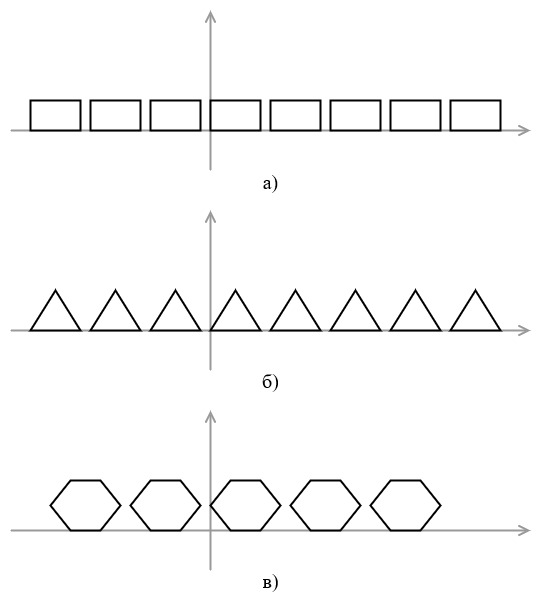

Рисунок 2 — Последовательности непересекающихся полигонов

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


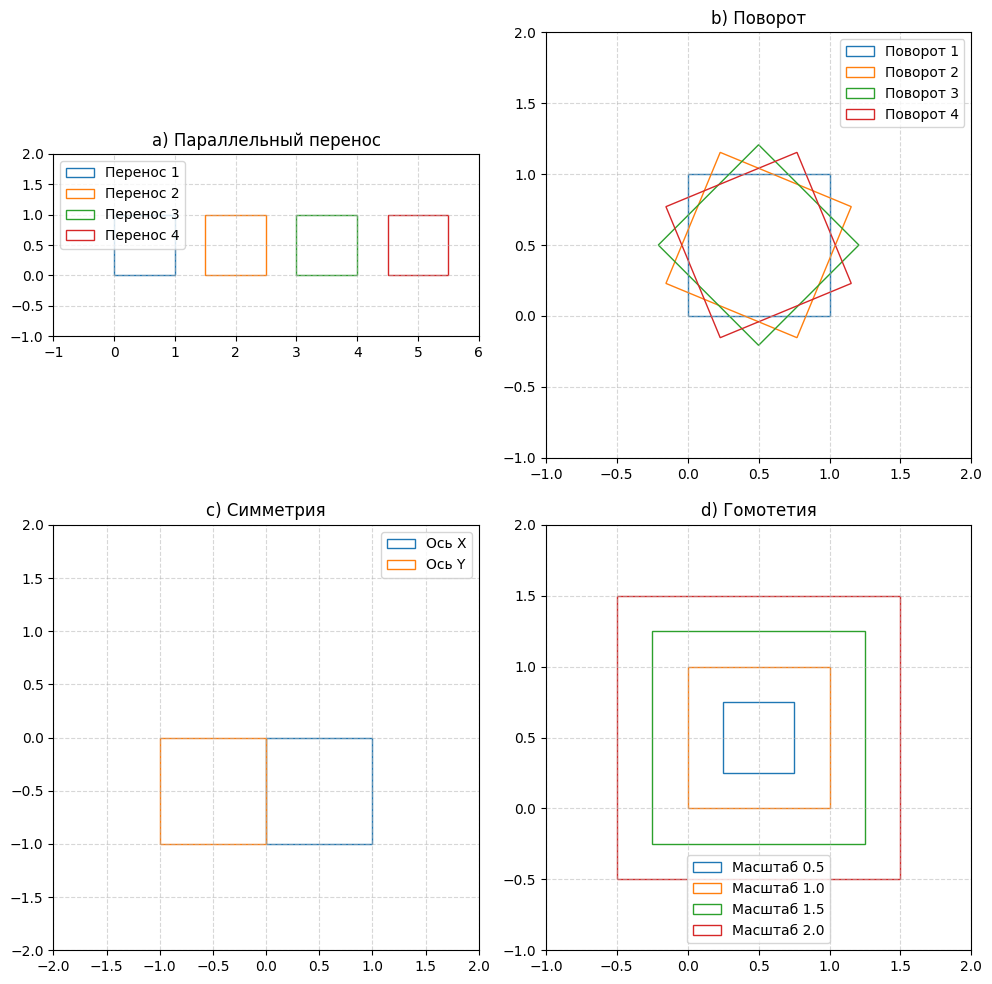

In [4]:
"""Модуль для геометрических преобразований полигонов с визуализацией.

Реализует четыре базовых преобразования:
- Параллельный перенос
- Поворот вокруг точки
- Симметрия относительно осей
- Гомотетия (масштабирование)
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def tr_translate(polygon, dx, dy):
    """Выполняет параллельный перенос полигона.

    Параметры:
        polygon: np.ndarray - массив точек полигона
        dx: float - смещение по оси X
        dy: float - смещение по оси Y

    Возвращает:
        np.ndarray - преобразованный полигон
    """
    return polygon + np.array([dx, dy])

def tr_rotate(polygon, angle, center=(0, 0)):
    """Поворачивает полигон на заданный угол вокруг центра.

    Параметры:
        polygon: np.ndarray - исходный полигон
        angle: float - угол поворота в радианах
        center: tuple - (x, y) центра вращения

    Возвращает:
        np.ndarray - повернутый полигон
    """
    cx, cy = center
    s, c = np.sin(angle), np.cos(angle)
    polygon = polygon - np.array([cx, cy])
    rotated = polygon @ np.array([[c, -s], [s, c]]) + np.array([cx, cy])
    return rotated

def tr_symmetry(polygon, axis='x'):
    """Отражает полигон относительно заданной оси.

    Параметры:
        polygon: np.ndarray - исходный полигон
        axis: str - ось симметрии ('x' или 'y')

    Возвращает:
        np.ndarray - отраженный полигон
    """
    if axis == 'x':
        return polygon * np.array([1, -1])
    elif axis == 'y':
        return polygon * np.array([-1, 1])
    return polygon.copy()

def tr_homothety(polygon, k, center=(0, 0)):
    """Масштабирует полигон относительно центра.

    Параметры:
        polygon: np.ndarray - исходный полигон
        k: float - коэффициент масштабирования
        center: tuple - (x, y) центра масштабирования

    Возвращает:
        np.ndarray - масштабированный полигон
    """
    cx, cy = center
    return center + (polygon - center) * k

def create_base_polygon():
    """Создает базовый квадратный полигон.

    Возвращает:
        np.ndarray - квадрат с координатами вершин
    """
    return np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

def apply_transformations():
    """Применяет последовательность преобразований к базовому полигону.

    Возвращает:
        tuple: (translated, rotated, mirrored, scaled) - кортеж списков
               преобразованных полигонов
    """
    base = create_base_polygon()

    translated = [tr_translate(base, i*1.5, 0) for i in range(4)]

    rotated = [tr_rotate(base, i*np.pi/8, center=(0.5, 0.5)) for i in range(4)]

    mirrored = [tr_symmetry(base, axis='x')]
    mirrored.append(tr_symmetry(mirrored[0], axis='y'))

    scaled = [tr_homothety(base, 0.5*(i+1), center=(0.5, 0.5)) for i in range(4)]

    return translated, rotated, mirrored, scaled

def plot_sequences(translated, rotated, mirrored, scaled):
    """Визуализирует результаты преобразований на сетке 2x2.

    Параметры:
        translated: list - полигоны после переноса
        rotated: list - полигоны после поворота
        mirrored: list - полигоны после отражения
        scaled: list - полигоны после масштабирования
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for i, poly in enumerate(translated):
        axs[0,0].add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}',
                            label=f'Перенос {i+1}'))
    axs[0,0].set_title('a) Параллельный перенос')
    axs[0,0].set_xlim(-1, 6)
    axs[0,0].set_ylim(-1, 2)
    axs[0,0].legend()

    for i, poly in enumerate(rotated):
        axs[0,1].add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}',
                                  label=f'Поворот {i+1}'))
    axs[0,1].set_title('b) Поворот')
    axs[0,1].set_xlim(-1, 2)
    axs[0,1].set_ylim(-1, 2)
    axs[0,1].legend()

    for i, poly in enumerate(mirrored):
        axs[1,0].add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}',
                                  label='Ось X' if i == 0 else 'Ось Y'))
    axs[1,0].set_title('c) Симметрия')
    axs[1,0].set_xlim(-2, 2)
    axs[1,0].set_ylim(-2, 2)
    axs[1,0].legend()

    for i, poly in enumerate(scaled):
        axs[1,1].add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}',
                           label=f'Масштаб {0.5*(i+1):.1f}'))
    axs[1,1].set_title('d) Гомотетия')
    axs[1,1].set_xlim(-1, 2)
    axs[1,1].set_ylim(-1, 2)
    axs[1,1].legend()

    for ax in axs.flat:
        ax.set_aspect('equal')
        ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    translated, rotated, mirrored, scaled = apply_transformations()
    plot_sequences(translated, rotated, mirrored, scaled)

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

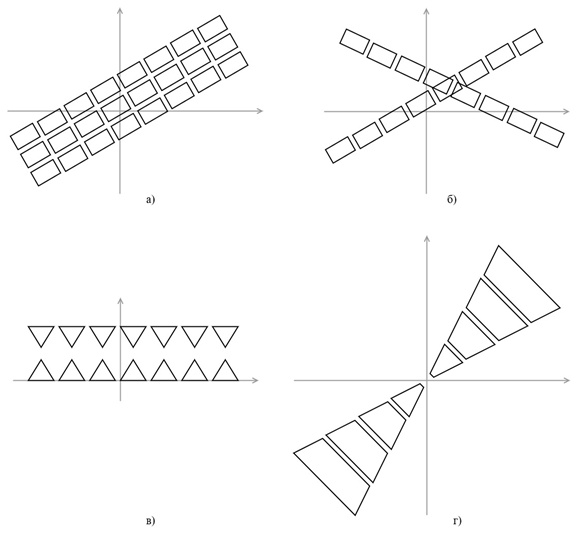

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

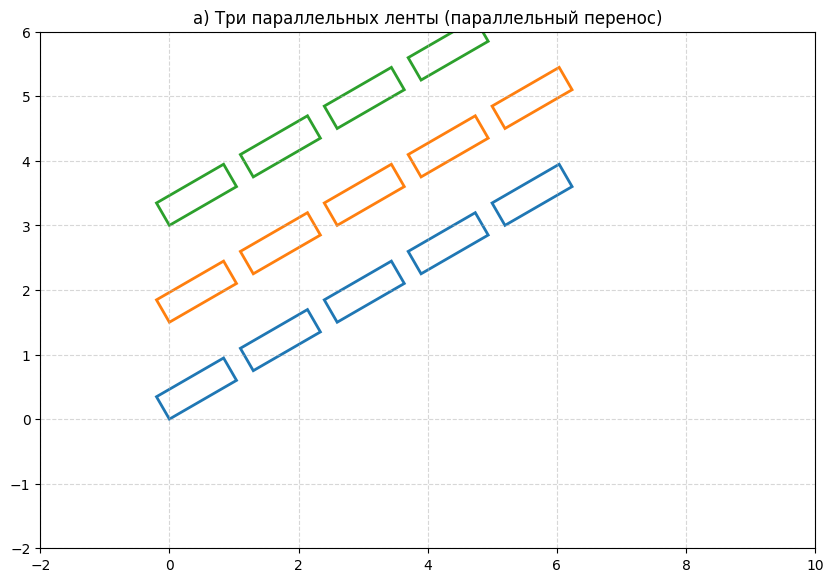

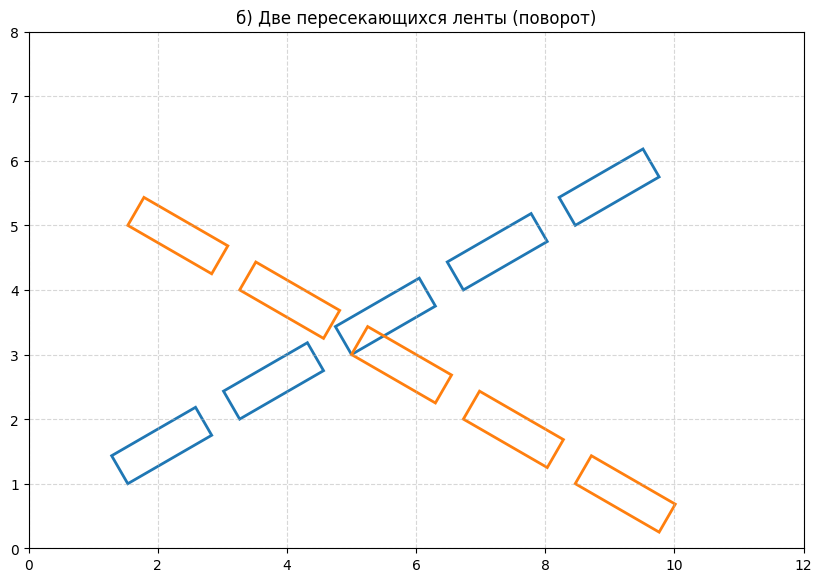

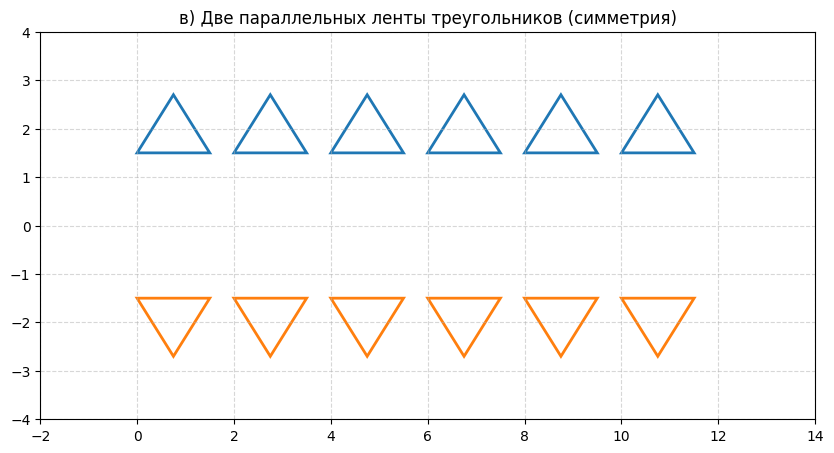

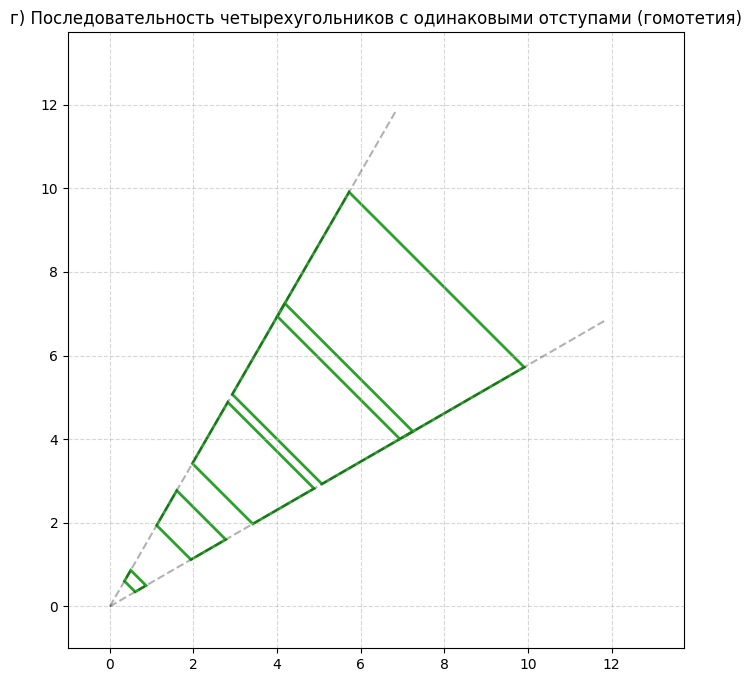

In [5]:
"""Модуль для работы с геометрическими преобразованиями полигонов.

Содержит функции для основных преобразований (перенос, поворот, симметрия, гомотетия)
и создания графических паттернов с использованием этих преобразований.
"""

def tr_translate(polygon, dx, dy):
    """Переносит полигон на заданные расстояния по осям X и Y.

    Параметры:
        polygon (ndarray): Массив точек исходного полигона
        dx (float): Смещение по оси X
        dy (float): Смещение по оси Y

    Возвращает:
        ndarray: Массив точек преобразованного полигона
    """
    return np.array([point + np.array([dx, dy]) for point in polygon])

def tr_rotate(polygon, angle, center=(0, 0)):
    """Поворачивает полигон на заданный угол вокруг центра.

    Параметры:
        polygon (ndarray): Массив точек исходного полигона
        angle (float): Угол поворота в радианах
        center (tuple, optional): Центр поворота (по умолчанию (0, 0))

    Возвращает:
        ndarray: Массив точек преобразованного полигона
    """
    cx, cy = center
    s, c = np.sin(angle), np.cos(angle)
    rotated = []
    for point in polygon:
        x, y = point[0] - cx, point[1] - cy
        new_x = c * x - s * y + cx
        new_y = s * x + c * y + cy
        rotated.append([new_x, new_y])
    return np.array(rotated)

def tr_symmetry(polygon, axis='x'):
    """Отражает полигон относительно заданной оси.

    Параметры:
        polygon (ndarray): Массив точек исходного полигона
        axis (str, optional): Ось симметрии ('x' или 'y') (по умолчанию 'x')

    Возвращает:
        ndarray: Массив точек преобразованного полигона
    """
    if axis == 'x':
        return np.array([[point[0], -point[1]] for point in polygon])
    elif axis == 'y':
        return np.array([[-point[0], point[1]] for point in polygon])
    else:
        return polygon.copy()

def tr_homothety(polygon, k, center=(0, 0)):
    """Масштабирует полигон относительно центра с заданным коэффициентом.

    Параметры:
        polygon (ndarray): Массив точек исходного полигона
        k (float): Коэффициент масштабирования
        center (tuple, optional): Центр масштабирования (по умолчанию (0, 0))

    Возвращает:
        ndarray: Массив точек преобразованного полигона
    """
    cx, cy = center
    return np.array([[(point[0] - cx) * k + cx,
                     (point[1] - cy) * k + cy] for point in polygon])

def create_rectangle(width=1, height=0.5):
    """Создает прямоугольник с заданными размерами.

    Параметры:
        width (float, optional): Ширина прямоугольника (по умолчанию 1)
        height (float, optional): Высота прямоугольника (по умолчанию 0.5)

    Возвращает:
        ndarray: Массив точек прямоугольника
    """
    return np.array([[0, 0], [width, 0], [width, height], [0, height]])

def create_triangle(base=1, height=1):
    """Создает равнобедренный треугольник с заданными основанием и высотой.

    Параметры:
        base (float, optional): Длина основания (по умолчанию 1)
        height (float, optional): Высота треугольника (по умолчанию 1)

    Возвращает:
        ndarray: Массив точек треугольника
    """
    return np.array([[0, 0], [base, 0], [base/2, height]])

def create_parallel_bands():
    """Создает визуализацию трех параллельных лент под углом.

    Демонстрирует применение параллельного переноса.
    """
    base_rect = create_rectangle(width=1.2, height=0.4)
    angle = np.pi/6  # 30 градусов

    fig, ax = plt.subplots(figsize=(10, 8))

    for band_idx in range(3):
        for i in range(5):
            rotated = tr_rotate(base_rect, angle)
            dx = i * 1.5 * np.cos(angle)
            dy = i * 1.5 * np.sin(angle) + band_idx * 1.5
            translated = tr_translate(rotated, dx, dy)
            ax.add_patch(Polygon(translated, fill=None, edgecolor=f'C{band_idx}', lw=2))

    ax.set_title('а) Три параллельных ленты (параллельный перенос)')
    ax.set_xlim(-2, 10)
    ax.set_ylim(-2, 6)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def create_intersecting_bands():
    """Создает визуализацию двух пересекающихся лент.

    Демонстрирует применение поворота.
    """
    base_rect = create_rectangle(width=1.5, height=0.5)
    angle1 = np.pi/6
    angle2 = -np.pi/6
    center = (5, 3)

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(5):
        rotated = tr_rotate(base_rect, angle1)
        dx = center[0] + (i-2) * 2.0 * np.cos(angle1)
        dy = center[1] + (i-2) * 2.0 * np.sin(angle1)
        translated = tr_translate(rotated, dx, dy)
        ax.add_patch(Polygon(translated, fill=None, edgecolor='C0', lw=2))

    for i in range(5):
        rotated = tr_rotate(base_rect, angle2)
        dx = center[0] + (i-2) * 2.0 * np.cos(angle2)
        dy = center[1] + (i-2) * 2.0 * np.sin(angle2)
        translated = tr_translate(rotated, dx, dy)
        ax.add_patch(Polygon(translated, fill=None, edgecolor='C1', lw=2))

    ax.set_title('б) Две пересекающихся ленты (поворот)')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def create_triangle_bands():
    """Создает визуализацию двух параллельных лент треугольников.

    Демонстрирует применение симметрии.
    """
    base_tri = create_triangle(base=1.5, height=1.2)

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(6):
        translated = tr_translate(base_tri, i * 2.0, 1.5)
        ax.add_patch(Polygon(translated, fill=None, edgecolor='C0', lw=2))

    mirrored = tr_symmetry(base_tri, 'x')
    for i in range(6):
        translated = tr_translate(mirrored, i * 2.0, -1.5)
        ax.add_patch(Polygon(translated, fill=None, edgecolor='C1', lw=2))

    ax.set_title('в) Две параллельных ленты треугольников (симметрия)')
    ax.set_xlim(-2, 14)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def create_scaled_quads():
    """Создает последовательность четырехугольников с одинаковыми отступами.

    Демонстрирует применение гомотетии.
    """
    angle1 = np.pi/6
    angle2 = np.pi/3
    base_size = 1.0
    gap = 1.0
    scale_factor = 1.2
    num_shapes = 5

    fig, ax = plt.subplots(figsize=(10, 8))

    positions = [0]
    for i in range(1, num_shapes):
        prev_size = base_size * (scale_factor ** (i-1))
        positions.append(positions[-1] + prev_size + gap)

    for i, pos in enumerate(positions):
        current_size = base_size * (scale_factor ** i)

        p1 = np.array([np.cos(angle1), np.sin(angle1)]) * (pos + current_size)
        p2 = np.array([np.cos(angle2), np.sin(angle2)]) * (pos + current_size)
        p3 = p2 * 0.7
        p4 = p1 * 0.7

        quad = np.array([p1, p2, p3, p4])
        ax.add_patch(Polygon(quad, fill=None, edgecolor='C2', lw=2))

    max_pos = positions[-1] + base_size * (scale_factor ** (num_shapes-1))
    line1_x = [0, np.cos(angle1) * max_pos * 1.2]
    line1_y = [0, np.sin(angle1) * max_pos * 1.2]
    line2_x = [0, np.cos(angle2) * max_pos * 1.2]
    line2_y = [0, np.sin(angle2) * max_pos * 1.2]

    ax.plot(line1_x, line1_y, 'k--', alpha=0.3)
    ax.plot(line2_x, line2_y, 'k--', alpha=0.3)

    ax.set_title('г) Последовательность четырехугольников с одинаковыми отступами (гомотетия)')
    ax.set_xlim(-1, max_pos * 1.2)
    ax.set_ylim(-1, max_pos * 1.2)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

create_parallel_bands()
create_intersecting_bands()
create_triangle_bands()
create_scaled_quads()

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


In [6]:
"""Модуль для фильтрации многоугольников по различным критериям.

Содержит функции для проверки выпуклости, наличия углов в заданных точках,
площади, длины сторон и других характеристик многоугольников.
"""

def flt_convex_polygon(polygon):
    """Проверяет, является ли многоугольник выпуклым.

    Параметры:
        polygon (ndarray): Массив точек многоугольника

    Возвращает:
        bool: True если многоугольник выпуклый, иначе False
    """
    if len(polygon) < 3:
        return False

    n = len(polygon)
    sign = 0
    for i in range(n):
        dx1 = polygon[(i+1)%n][0] - polygon[i][0]
        dy1 = polygon[(i+1)%n][1] - polygon[i][1]
        dx2 = polygon[(i+2)%n][0] - polygon[(i+1)%n][0]
        dy2 = polygon[(i+2)%n][1] - polygon[(i+1)%n][1]
        cross = dx1*dy2 - dy1*dx2

        if cross != 0:
            if sign == 0:
                sign = 1 if cross > 0 else -1
            elif (cross > 0 and sign == -1) or (cross < 0 and sign == 1):
                return False
    return True

def flt_angle_point(polygon, point):
    """Проверяет, содержит ли многоугольник вершину в заданной точке.

    Параметры:
        polygon (ndarray): Массив точек многоугольника
        point (tuple): Координаты точки (x, y)

    Возвращает:
        bool: True если точка является вершиной многоугольника
    """
    return any(np.allclose(vertex, point) for vertex in polygon)

def flt_square(polygon, max_square):
    """Проверяет, что площадь многоугольника меньше заданного значения.

    Параметры:
        polygon (ndarray): Массив точек многоугольника
        max_square (float): Максимальная допустимая площадь

    Возвращает:
        bool: True если площадь меньше max_square
    """
    area = 0
    n = len(polygon)
    for i in range(n):
        x_i, y_i = polygon[i]
        x_j, y_j = polygon[(i+1)%n]
        area += (x_i * y_j) - (x_j * y_i)
    return abs(area) / 2 < max_square

def flt_short_side(polygon, min_length):
    """Проверяет, что кратчайшая сторона многоугольника меньше заданной длины.

    Параметры:
        polygon (ndarray): Массив точек многоугольника
        min_length (float): Минимальная длина стороны для проверки

    Возвращает:
        bool: True если есть сторона короче min_length
    """
    min_side = float('inf')
    n = len(polygon)
    for i in range(n):
        p1 = polygon[i]
        p2 = polygon[(i+1)%n]
        side_length = np.linalg.norm(p2 - p1)
        if side_length < min_side:
            min_side = side_length
    return min_side < min_length

def flt_point_inside(polygon, point):
    """Проверяет, содержит ли выпуклый многоугольник заданную точку внутри.

    Параметры:
        polygon (ndarray): Массив точек многоугольника
        point (tuple): Координаты точки (x, y)

    Возвращает:
        bool: True если точка внутри многоугольника
    """
    if not flt_convex_polygon(polygon):
        return False

    path = Path(polygon)
    return path.contains_point(point)

def flt_polygon_angles_inside(polygon, target_polygon):
    """Проверяет, содержит ли многоугольник вершины другого многоугольника.

    Параметры:
        polygon (ndarray): Массив точек проверяемого многоугольника
        target_polygon (ndarray): Массив точек целевого многоугольника

    Возвращает:
        bool: True если содержит хотя бы одну вершину целевого многоугольника
    """
    if not flt_convex_polygon(polygon):
        return False

    path = Path(polygon)
    return any(path.contains_point(vertex) for vertex in target_polygon)

if __name__ == "__main__":

    polygons = [
        np.array([[0,0], [1,0], [1,1], [0,1]]),
        np.array([[0,0], [2,0], [1,1], [1,3]]),
        np.array([[0,0], [1,0], [0.5,0.5]]),
        np.array([[0,0], [1,0], [1,1], [0.5,0.5], [0,1]])
    ]

    convex_polygons = list(filter(flt_convex_polygon, polygons))
    print(f"Выпуклые многоугольники: {len(convex_polygons)}")

    angle_point_polygons = list(filter(lambda p: flt_angle_point(p, (0.5,0.5)), polygons))
    print(f"Фигуры с углом в (0.5,0.5): {len(angle_point_polygons)}")

    small_polygons = list(filter(lambda p: flt_square(p, 0.6), polygons))
    print(f"Фигуры площадью < 0.6: {len(small_polygons)}")

    short_side_polygons = list(filter(lambda p: flt_short_side(p, 1.0), polygons))
    print(f"Фигуры с короткой стороной < 1.0: {len(short_side_polygons)}")

    point_inside_polygons = list(filter(lambda p: flt_point_inside(p, (0.6,0.6)), polygons))
    print(f"Выпуклые фигуры, содержащие (0.6,0.6): {len(point_inside_polygons)}")

    target = np.array([[0.5,0.5], [1.5,0.5], [1.5,1.5]])
    angles_inside_polygons = list(filter(lambda p: flt_polygon_angles_inside(p, target), polygons))
    print(f"Фигуры, содержащие углы целевого многоугольника: {len(angles_inside_polygons)}")

Выпуклые многоугольники: 2
Фигуры с углом в (0.5,0.5): 2
Фигуры площадью < 0.6: 1
Фигуры с короткой стороной < 1.0: 2
Выпуклые фигуры, содержащие (0.6,0.6): 1
Фигуры, содержащие углы целевого многоугольника: 2


6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**обязательная часть: 1 пункт<br>3 пункта — сложность 1**

Фильтрация 6 выпуклых четырехугольников между прямыми:


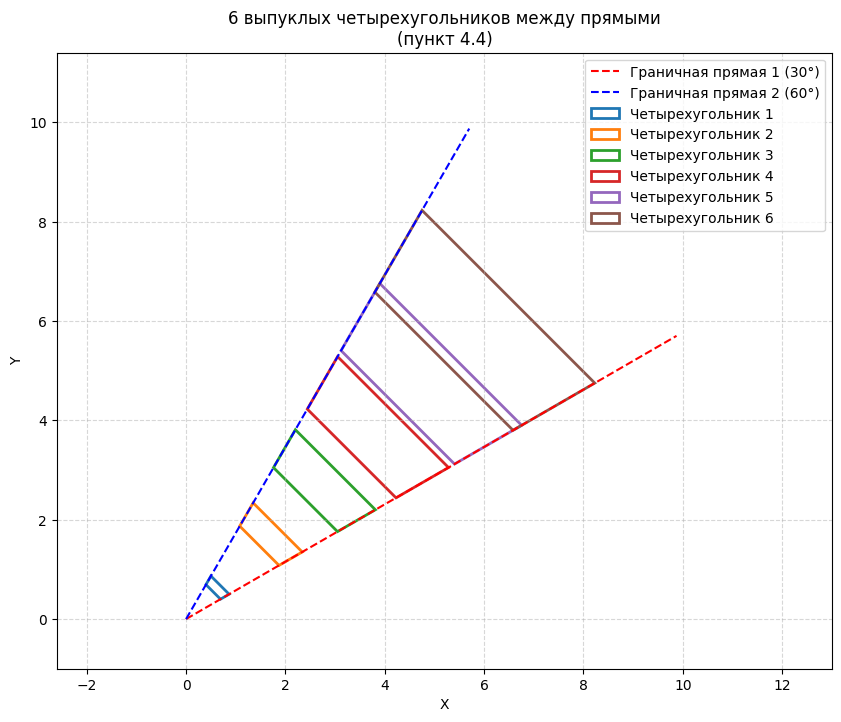


2. Фильтрация 6 выпуклых фигур из последовательности:


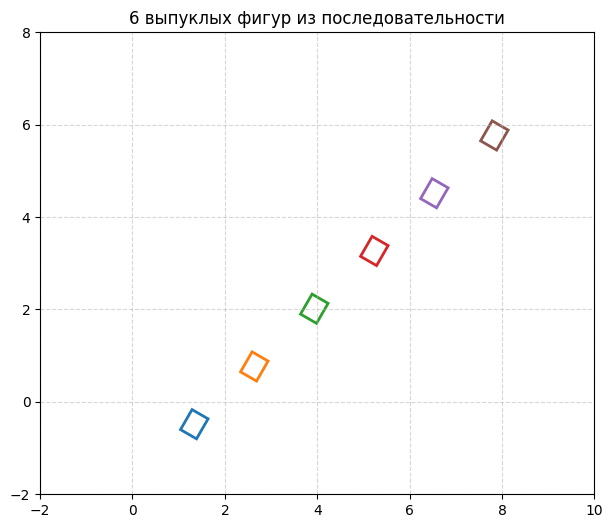


3. Фильтрация по кратчайшей стороне (не более 4 фигур):


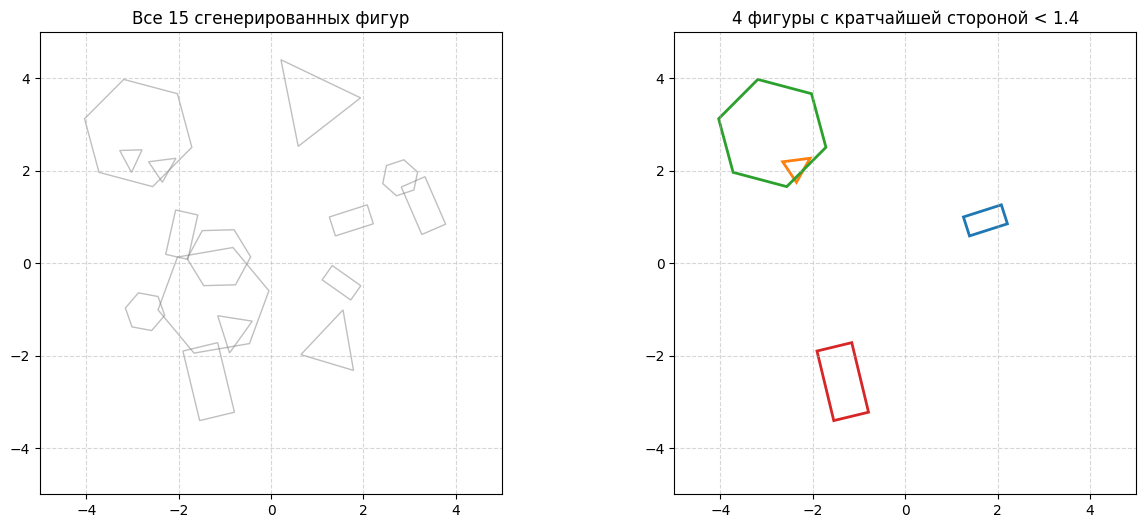


4. Фильтрация пересекающихся фигур:


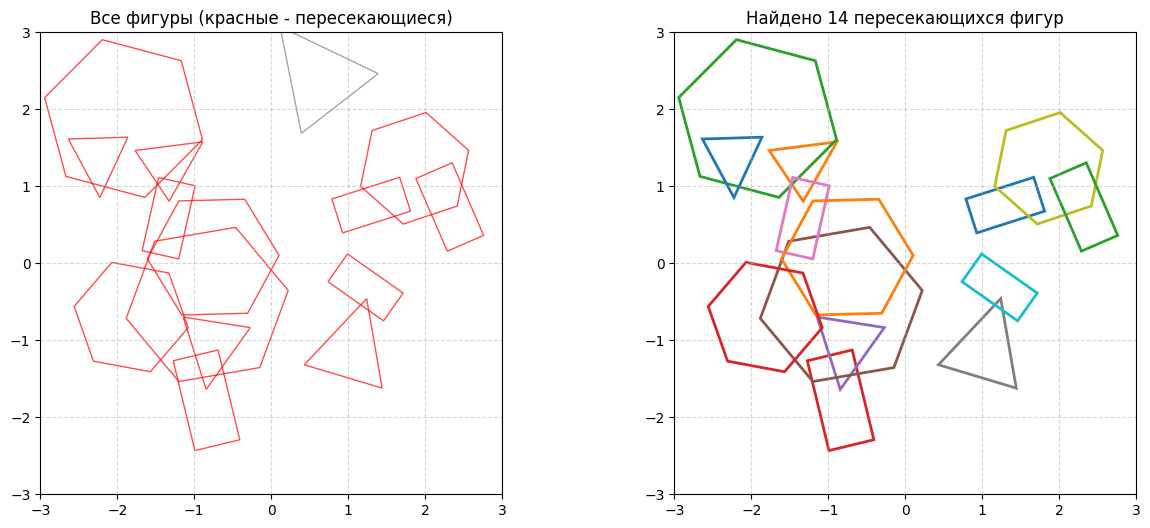

In [7]:
"""Модуль для генерации и преобразования геометрических фигур.

Содержит функции для создания последовательностей фигур, их преобразования
и фильтрации по различным критериям.
"""

def gen_rectangle(start_x=0, width=1, height=0.5, step=1.5):
    """Генератор бесконечной последовательности прямоугольников.

    Параметры:
        start_x (float): Начальная координата X первого прямоугольника
        width (float): Ширина прямоугольников
        height (float): Высота прямоугольников
        step (float): Шаг между прямоугольниками

    Возвращает:
        generator: Генератор массивов точек прямоугольников
    """
    for i in count():
        yield np.array([
            [start_x + i*step, 0],
            [start_x + i*step + width, 0],
            [start_x + i*step + width, height],
            [start_x + i*step, height]
        ])

def gen_triangle(start_x=0, base=1, height=1, step=1.5):
    """Генератор бесконечной последовательности треугольников.

    Параметры:
        start_x (float): Начальная координата X первого треугольника
        base (float): Основание треугольников
        height (float): Высота треугольников
        step (float): Шаг между треугольниками

    Возвращает:
        generator: Генератор массивов точек треугольников
    """
    for i in count():
        yield np.array([
            [start_x + i*step, 0],
            [start_x + i*step + base, 0],
            [start_x + i*step + base/2, height]
        ])

def gen_hexagon(start_x=0, size=1, step=2.5):
    """Генератор бесконечной последовательности шестиугольников.

    Параметры:
        start_x (float): Начальная координата X первого шестиугольника
        size (float): Размер шестиугольников
        step (float): Шаг между шестиугольниками

    Возвращает:
        generator: Генератор массивов точек шестиугольников
    """
    for i in count():
        angles = np.linspace(0, 2*np.pi, 7)[:-1]
        x = start_x + i*step + size * np.cos(angles)
        y = size * np.sin(angles)
        yield np.column_stack((x, y))

def tr_translate(polygon, dx, dy):
    """Параллельный перенос фигуры.

    Параметры:
        polygon (ndarray): Массив точек фигуры
        dx (float): Смещение по оси X
        dy (float): Смещение по оси Y

    Возвращает:
        ndarray: Массив точек преобразованной фигуры
    """
    return polygon + np.array([dx, dy])

def tr_rotate(polygon, angle, center=(0,0)):
    """Поворот фигуры относительно центра.

    Параметры:
        polygon (ndarray): Массив точек фигуры
        angle (float): Угол поворота в радианах
        center (tuple): Координаты центра поворота (x, y)

    Возвращает:
        ndarray: Массив точек преобразованной фигуры
    """
    cx, cy = center
    s, c = np.sin(angle), np.cos(angle)
    polygon = polygon - np.array([cx, cy])
    rotated = np.dot(polygon, np.array([[c, -s], [s, c]])) + np.array([cx, cy])
    return rotated

def tr_symmetry(polygon, axis='x'):
    """Отражение фигуры относительно оси.

    Параметры:
        polygon (ndarray): Массив точек фигуры
        axis (str): Ось симметрии ('x' или 'y')

    Возвращает:
        ndarray: Массив точек преобразованной фигуры
    """
    if axis == 'x':
        return polygon * np.array([1, -1])
    elif axis == 'y':
        return polygon * np.array([-1, 1])
    return polygon.copy()

def tr_homothety(polygon, k, center=(0,0)):
    """Масштабирование фигуры относительно центра.

    Параметры:
        polygon (ndarray): Массив точек фигуры
        k (float): Коэффициент масштабирования
        center (tuple): Координаты центра масштабирования (x, y)

    Возвращает:
        ndarray: Массив точек преобразованной фигуры
    """
    return center + (polygon - center) * k

def generate_7_figures():
    """Генерирует и визуализирует 7 фигур (2 прямоугольника, 3 треугольника, 2 шестиугольника)."""
    figures = []

    rect_gen = gen_rectangle(step=3)
    tri_gen = gen_triangle(step=3)
    hex_gen = gen_hexagon(step=4)

    figures.extend(islice(rect_gen, 2))
    figures.extend(islice(tri_gen, 3))
    figures.extend(islice(hex_gen, 2))

    plt.figure(figsize=(12, 6))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown']

    for i, poly in enumerate(figures):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=colors[i], lw=2,
                              label=f'Фигура {i+1}'))

    plt.title('7 фигур: прямоугольники, треугольники и шестиугольники')
    plt.xlim(-2, 20)
    plt.ylim(-5, 5)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

def filter_6_convex():
    """Фильтрует и визуализирует 6 выпуклых фигур из последовательности."""
    angle = np.pi/6
    base_poly = next(gen_rectangle(1.2, 0.4))
    polygons = []

    for i in range(9):
        rotated = tr_rotate(base_poly, angle)
        translated = tr_translate(rotated, i*1.5*np.cos(angle), i*1.5*np.sin(angle)+i*0.5)
        polygons.append(translated)

    convex_polygons = [p for p in polygons if is_convex(p)][:6]

    plt.figure(figsize=(10,6))
    for i, poly in enumerate(convex_polygons):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2))
    plt.title('6 выпуклых фигур из последовательности')
    plt.xlim(-2,10)
    plt.ylim(-2,8)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

def filter_short_sides():
    """Фильтрует и визуализирует фигуры по кратчайшей стороне (не более 4 фигур)."""
    np.random.seed(42)
    polygons = []

    shapes = cycle([gen_rectangle, gen_triangle, gen_hexagon])

    for i, shape_gen in enumerate(islice(shapes, 15)):
        base_poly = next(shape_gen())

        k = np.random.uniform(0.3, 1.8)
        angle = np.random.uniform(0, 2*np.pi)
        dx, dy = np.random.uniform(-3, 3, 2)

        transformed = tr_homothety(base_poly, k)
        transformed = tr_rotate(transformed, angle)
        transformed = tr_translate(transformed, dx, dy)
        polygons.append(transformed)

    max_length = 1.4
    filtered = [p for p in polygons if shortest_side_length(p) < max_length][:4]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    for poly in polygons:
        ax1.add_patch(Polygon(poly, fill=None, edgecolor='gray', alpha=0.5))
    ax1.set_title('Все 15 сгенерированных фигур')

    for i, poly in enumerate(filtered):
        ax2.add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2))
    ax2.set_title(f'4 фигуры с кратчайшей стороной < {max_length}')

    for ax in (ax1, ax2):
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_aspect('equal')
    plt.show()

def filter_intersecting():
    """Фильтрует и визуализирует пересекающиеся фигуры."""
    np.random.seed(42)
    polygons = []

    shapes = cycle([gen_rectangle, gen_triangle, gen_hexagon])

    for i, shape_gen in enumerate(islice(shapes, 15)):
        base_poly = next(shape_gen())

        k = np.random.uniform(0.7, 1.3)
        angle = np.random.uniform(0, 2*np.pi)
        dx, dy = np.random.uniform(-2, 2, 2)

        transformed = tr_homothety(base_poly, k)
        transformed = tr_rotate(transformed, angle)
        transformed = tr_translate(transformed, dx, dy)
        polygons.append(transformed)

    intersecting = set()
    for i in range(len(polygons)):
        for j in range(i+1, len(polygons)):
            if do_polygons_intersect(polygons[i], polygons[j]):
                intersecting.add(i)
                intersecting.add(j)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    for i, poly in enumerate(polygons):
        color = 'red' if i in intersecting else 'gray'
        ax1.add_patch(Polygon(poly, fill=None, edgecolor=color, alpha=0.7))
    ax1.set_title('Все фигуры (красные - пересекающиеся)')

    for i, idx in enumerate(intersecting):
        ax2.add_patch(Polygon(polygons[idx], fill=None, edgecolor=f'C{i}', lw=2))
    ax2.set_title(f'Найдено {len(intersecting)} пересекающихся фигур')

    for ax in (ax1, ax2):
        ax.set_xlim(-3,3)
        ax.set_ylim(-3,3)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_aspect('equal')
    plt.show()

def is_convex(polygon):
    """Проверяет, является ли многоугольник выпуклым.

    Параметры:
        polygon (ndarray): Массив точек многоугольника

    Возвращает:
        bool: True если многоугольник выпуклый, иначе False
    """
    if len(polygon) < 3: return False
    cross = 0
    for i in range(len(polygon)):
        a, b, c = polygon[i], polygon[(i+1)%len(polygon)], polygon[(i+2)%len(polygon)]
        ab = b - a
        bc = c - b
        current_cross = ab[0]*bc[1] - ab[1]*bc[0]
        if current_cross != 0:
            if cross == 0:
                cross = current_cross
            elif (current_cross > 0) != (cross > 0):
                return False
    return True

def shortest_side_length(polygon):
    """Вычисляет длину кратчайшей стороны многоугольника.

    Параметры:
        polygon (ndarray): Массив точек многоугольника

    Возвращает:
        float: Длина кратчайшей стороны
    """
    sides = [np.linalg.norm(polygon[(i+1)%len(polygon)] - polygon[i])
             for i in range(len(polygon))]
    return min(sides)

def do_polygons_intersect(poly1, poly2):
    """Проверяет, пересекаются ли два многоугольника.

    Параметры:
        poly1 (ndarray): Массив точек первого многоугольника
        poly2 (ndarray): Массив точек второго многоугольника

    Возвращает:
        bool: True если многоугольники пересекаются, иначе False
    """
    path1 = Path(poly1)
    path2 = Path(poly2)
    if any(path1.contains_point(p) for p in poly2): return True
    if any(path2.contains_point(p) for p in poly1): return True

    for i in range(len(poly1)):
        for j in range(len(poly2)):
            a1, a2 = poly1[i], poly1[(i+1)%len(poly1)]
            b1, b2 = poly2[j], poly2[(j+1)%len(poly2)]

            def ccw(A,B,C):
                return (C[1]-A[1])*(B[0]-A[0]) > (B[1]-A[1])*(C[0]-A[0])

            if ccw(a1,a2,b1) != ccw(a1,a2,b2) and ccw(b1,b2,a1) != ccw(b1,b2,a2):
                return True
    return False

def create_quads_between_lines():
    """Создает последовательность четырехугольников между двумя прямыми.

    Возвращает:
        list: Список массивов точек четырехугольников
    """
    angle1 = np.pi/6
    angle2 = np.pi/3
    scales = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
    gap = 1.2

    quads = []
    for i, scale in enumerate(scales):
        pos = i * gap

        p1 = np.array([np.cos(angle1), np.sin(angle1)]) * (pos + scale)
        p2 = np.array([np.cos(angle2), np.sin(angle2)]) * (pos + scale)

        p3 = p2 * 0.8
        p4 = p1 * 0.8

        quad = np.array([p1, p2, p3, p4])
        quads.append(quad)

    return quads

def filter_and_visualize_6_quads():
    """Фильтрует и визуализирует 6 выпуклых четырехугольников между прямыми."""

    quads = create_quads_between_lines()

    convex_quads = [q for q in quads if is_convex(q)][:6]

    plt.figure(figsize=(10, 8))

    max_dist = max(np.linalg.norm(q[0]) for q in convex_quads) * 1.2
    line1 = np.array([[0, 0], [np.cos(np.pi/6)*max_dist, np.sin(np.pi/6)*max_dist]])
    line2 = np.array([[0, 0], [np.cos(np.pi/3)*max_dist, np.sin(np.pi/3)*max_dist]])

    plt.plot(line1[:,0], line1[:,1], 'r--', label='Граничная прямая 1 (30°)')
    plt.plot(line2[:,0], line2[:,1], 'b--', label='Граничная прямая 2 (60°)')

    for i, quad in enumerate(convex_quads):
        plt.gca().add_patch(Polygon(quad, fill=None, edgecolor=f'C{i}', lw=2,
                                  label=f'Четырехугольник {i+1}'))

    plt.title('6 выпуклых четырехугольников между прямыми\n(пункт 4.4)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    plt.xlim(-1, max_dist)
    plt.ylim(-1, max_dist)
    plt.show()

if __name__ == "__main__":
    print("Фильтрация 6 выпуклых четырехугольников между прямыми:")
    filter_and_visualize_6_quads()

    print("\n2. Фильтрация 6 выпуклых фигур из последовательности:")
    filter_6_convex()

    print("\n3. Фильтрация по кратчайшей стороне (не более 4 фигур):")
    filter_short_sides()

    print("\n4. Фильтрация пересекающихся фигур:")
    filter_intersecting()

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>5 пунктов — сложность 1**

Демонстрация фильтрующих декораторов:


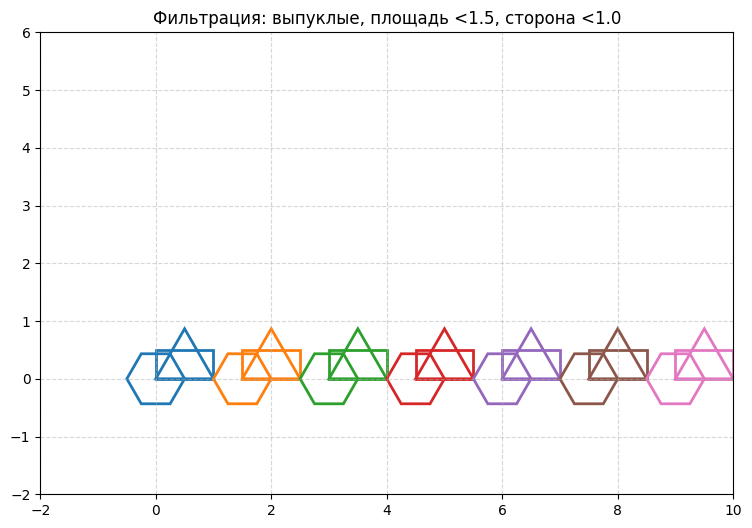

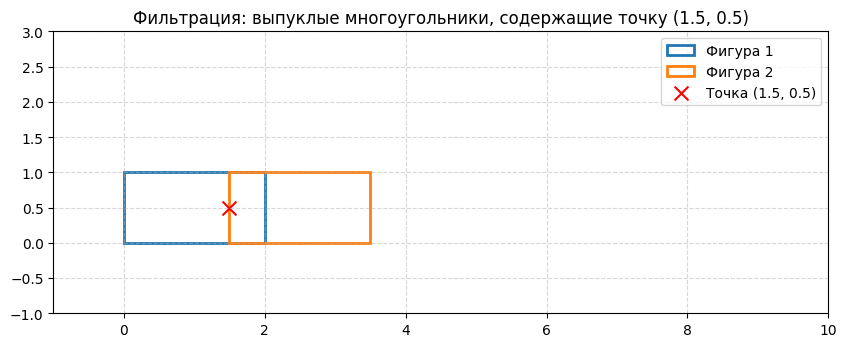


Демонстрация преобразующих декораторов:


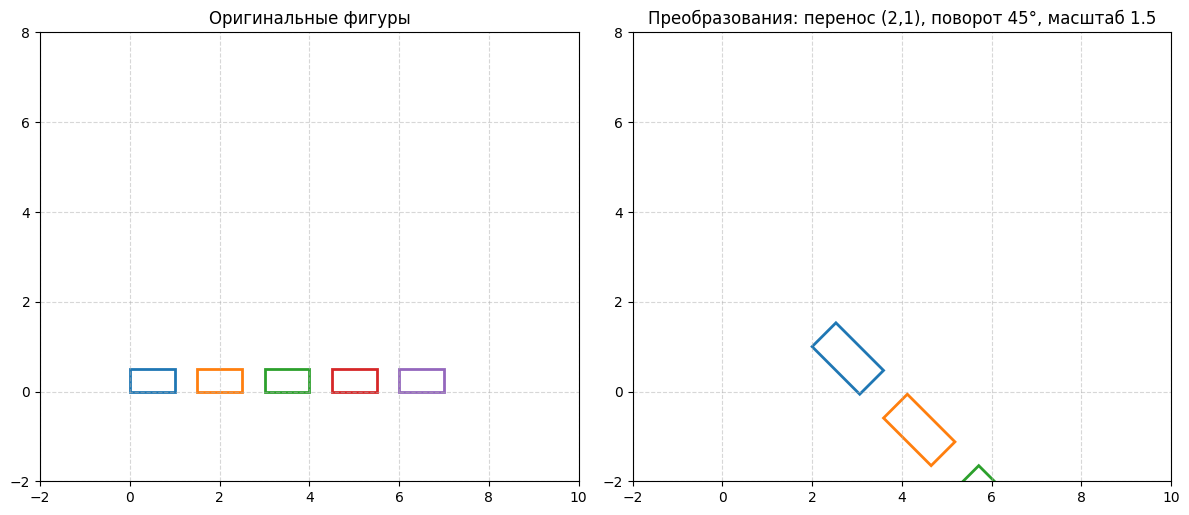

In [ ]:
"""Модуль для работы с геометрическими фигурами.

Содержит генераторы фигур, фильтры и преобразования для работы с многоугольниками.
"""

def gen_rectangle(width=1, height=0.5, step=1.5):
    """Генератор бесконечной последовательности прямоугольников.

    Аргументы:
        width (float): Ширина прямоугольника (по умолчанию 1)
        height (float): Высота прямоугольника (по умолчанию 0.5)
        step (float): Шаг между прямоугольниками (по умолчанию 1.5)

    Возвращает:
        generator: Генератор массивов точек прямоугольников
    """
    x = 0
    while True:
        yield np.array([[x, 0], [x+width, 0], [x+width, height], [x, height]])
        x += step

def gen_triangle(side=1, step=1.5):
    """Генератор бесконечной последовательности треугольников.

    Аргументы:
        side (float): Длина основания треугольника (по умолчанию 1)
        step (float): Шаг между треугольниками (по умолчанию 1.5)

    Возвращает:
        generator: Генератор массивов точек треугольников
    """
    x = 0
    height = side * np.sqrt(3) / 2
    while True:
        yield np.array([[x, 0], [x+side, 0], [x+side/2, height]])
        x += step

def gen_hexagon(radius=0.5, step=1.5):
    """Генератор бесконечной последовательности шестиугольников.

    Аргументы:
        radius (float): Радиус шестиугольника (по умолчанию 0.5)
        step (float): Шаг между шестиугольниками (по умолчанию 1.5)

    Возвращает:
        generator: Генератор массивов точек шестиугольников
    """
    x = 0
    while True:
        angles = np.linspace(0, 2*np.pi, 7)[:-1]
        yield np.column_stack((x + radius*np.cos(angles), radius*np.sin(angles)))
        x += step

def demo_filters():
    """Демонстрация работы фильтрующих декораторов.

    Показывает примеры:
    1. Фильтрация по выпуклости, площади и длине стороны
    2. Фильтрация по наличию точки внутри фигуры
    """
    @flt_convex_polygon
    @flt_square(max_square=1.5)
    @flt_short_side(min_length=1.0)
    def get_polygons():
        rects = islice(gen_rectangle(), 10)
        tris = islice(gen_triangle(), 10)
        hexs = islice(gen_hexagon(), 10)
        return list(rects) + list(tris) + list(hexs)

    polygons = list(get_polygons())
    visualize_filters(polygons, "Фильтрация: выпуклые, площадь <1.5, сторона <1.0")

    @flt_convex_polygon
    @flt_point_inside(point=(1.5, 0.5))
    def get_polygons_with_point():
        rect_gen = (np.array([[x, 0], [x+2, 0], [x+2, 1], [x, 1]])
                   for x in np.arange(0, 10, 1.5))
        tris_gen = (np.array([[x, y], [x+1, y], [x+0.5, y+1]])
                   for x, y in zip(np.arange(0, 10, 1.5), np.arange(0, 3, 0.3)))
        return list(rect_gen) + list(tris_gen)

    polygons = list(get_polygons_with_point())

    plt.figure(figsize=(10, 6))
    for i, poly in enumerate(polygons):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2,
                              label=f'Фигура {i+1}'))
    plt.scatter([1.5], [0.5], c='red', s=100, marker='x', label='Точка (1.5, 0.5)')
    plt.title("Фильтрация: выпуклые многоугольники, содержащие точку (1.5, 0.5)")
    plt.xlim(-1, 10)
    plt.ylim(-1, 3)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

def tr_translate(dx, dy):
    """Декоратор для параллельного переноса фигур.

    Аргументы:
        dx (float): Смещение по оси X
        dy (float): Смещение по оси Y

    Возвращает:
        function: Декорированную функцию
    """
    def decorator(func):
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return [polygon + np.array([dx, dy]) for polygon in polygons]
        return wrapper
    return decorator

def tr_rotate(angle, center=(0,0)):
    """Декоратор для поворота фигур.

    Аргументы:
        angle (float): Угол поворота в радианах
        center (tuple): Центр поворота (по умолчанию (0, 0))

    Возвращает:
        function: Декорированную функцию
    """
    def decorator(func):
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            cx, cy = center
            s, c = np.sin(angle), np.cos(angle)
            rotation = np.array([[c, -s], [s, c]])
            return [(polygon - [cx, cy]) @ rotation + [cx, cy] for polygon in polygons]
        return wrapper
    return decorator

def tr_homothety(k, center=(0,0)):
    """Декоратор для масштабирования фигур.

    Аргументы:
        k (float): Коэффициент масштабирования
        center (tuple): Центр масштабирования (по умолчанию (0, 0))

    Возвращает:
        function: Декорированную функцию
    """
    def decorator(func):
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return [center + (polygon - center) * k for polygon in polygons]
        return wrapper
    return decorator

def demo_transformations():
    """Демонстрация преобразований фигур.

    Показывает последовательное применение:
    1. Масштабирования (1.5x)
    2. Поворота (45 градусов)
    3. Переноса (на (2, 1))
    """
    @tr_translate(2, 1)
    @tr_rotate(np.pi/4)
    @tr_homothety(1.5)
    def get_transformed_rectangles():
        return islice(gen_rectangle(), 5)

    original = list(islice(gen_rectangle(), 5))
    transformed = list(get_transformed_rectangles())
    visualize_transformations(original, transformed,
                            "Преобразования: перенос (2,1), поворот 45°, масштаб 1.5")

def visualize_filters(polygons, title):
    """Визуализация отфильтрованных фигур.

    Аргументы:
        polygons (list): Список многоугольников
        title (str): Заголовок графика
    """
    plt.figure(figsize=(10, 6))
    for i, poly in enumerate(polygons):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2))
    plt.title(title)
    plt.xlim(-2, 10)
    plt.ylim(-2, 6)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

def visualize_transformations(original, transformed, title):
    """Визуализация оригинальных и преобразованных фигур.

    Аргументы:
        original (list): Оригинальные фигуры
        transformed (list): Преобразованные фигуры
        title (str): Заголовок для преобразованных фигур
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for i, poly in enumerate(original):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2))
    plt.title("Оригинальные фигуры")

    plt.subplot(1, 2, 2)
    for i, poly in enumerate(transformed):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', lw=2))
    plt.title(title)

    for ax in plt.gcf().axes:
        ax.set_xlim(-2, 10)
        ax.set_ylim(-2, 8)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Демонстрация фильтрующих декораторов:")
    demo_filters()

    print("\nДемонстрация преобразующих декораторов:")
    demo_transformations()

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


Демонстрация функций агрегации:


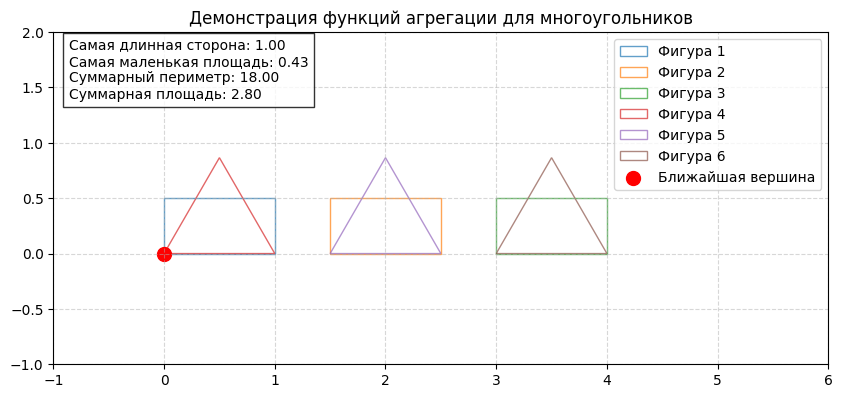


Результаты:
 nearest_vertex: [0. 0.]
   longest_side: 1.0000
  smallest_area: 0.4330
total_perimeter: 18.0000
     total_area: 2.7990


In [ ]:
"""Модуль для работы с геометрическими фигурами.

Содержит функции для вычисления характеристик многоугольников,
генераторы фигур и функции агрегации для работы с наборами фигур.
"""

def polygon_area(polygon):
    """Вычисляет площадь многоугольника по координатам вершин.

    Параметры:
        polygon (ndarray): Массив вершин многоугольника в формате [[x1,y1], [x2,y2], ...]

    Возвращает:
        float: Площадь многоугольника
    """
    x, y = polygon[:, 0], polygon[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def polygon_perimeter(polygon):
    """Вычисляет периметр многоугольника.

    Параметры:
        polygon (ndarray): Массив вершин многоугольника

    Возвращает:
        float: Периметр многоугольника
    """
    return sum(np.linalg.norm(polygon[(i+1)%len(polygon)] - polygon[i])
              for i in range(len(polygon)))

def agr_origin_nearest(polygons):
    """Находит вершину многоугольника, ближайшую к началу координат.

    Параметры:
        polygons (list): Список многоугольников

    Возвращает:
        ndarray: Координаты ближайшей вершины [x,y]
    """
    def distance_to_origin(point):
        return np.linalg.norm(point)

    all_vertices = [vertex for poly in polygons for vertex in poly]
    return min(all_vertices, key=distance_to_origin)

def agr_max_side(polygons):
    """Находит длину самой длинной стороны среди всех многоугольников.

    Параметры:
        polygons (list): Список многоугольников

    Возвращает:
        float: Длина самой длинной стороны
    """
    def get_max_side(polygon):
        return max(np.linalg.norm(polygon[(i+1)%len(polygon)] - polygon[i])
                  for i in range(len(polygon)))

    max_sides = [get_max_side(poly) for poly in polygons]
    return max(max_sides) if max_sides else 0

def agr_min_area(polygons):
    """Находит минимальную площадь среди всех многоугольников.

    Параметры:
        polygons (list): Список многоугольников

    Возвращает:
        float: Минимальная площадь
    """
    areas = [polygon_area(poly) for poly in polygons]
    return min(areas) if areas else 0

def agr_perimeter(polygons):
    """Вычисляет суммарный периметр всех многоугольников.

    Параметры:
        polygons (list): Список многоугольников

    Возвращает:
        float: Суммарный периметр
    """
    return sum(polygon_perimeter(poly) for poly in polygons)

def agr_area(polygons):
    """Вычисляет суммарную площадь всех многоугольников.

    Параметры:
        polygons (list): Список многоугольников

    Возвращает:
        float: Суммарная площадь
    """
    return sum(polygon_area(poly) for poly in polygons)

def gen_rectangle(width=1, height=0.5, step=1.5):
    """Генератор прямоугольников.

    Параметры:
        width (float): Ширина прямоугольника (по умолчанию 1)
        height (float): Высота прямоугольника (по умолчанию 0.5)
        step (float): Шаг между прямоугольниками (по умолчанию 1.5)

    Возвращает:
        generator: Генератор прямоугольников
    """
    x = 0
    while True:
        yield np.array([[x, 0], [x+width, 0], [x+width, height], [x, height]])
        x += step

def gen_triangle(side=1, step=1.5):
    """Генератор равносторонних треугольников.

    Параметры:
        side (float): Длина стороны треугольника (по умолчанию 1)
        step (float): Шаг между треугольниками (по умолчанию 1.5)

    Возвращает:
        generator: Генератор треугольников
    """
    x = 0
    height = side * np.sqrt(3) / 2
    while True:
        yield np.array([[x, 0], [x+side, 0], [x+side/2, height]])
        x += step

def demo_aggregations():
    """Демонстрирует работу функций агрегации на примере набора фигур.

    Создает 3 прямоугольника и 3 треугольника, применяет к ним функции агрегации
    и визуализирует результат с отображением ближайшей вершины к началу координат.

    Возвращает:
        dict: Словарь с результатами агрегации:
            - nearest_vertex: ближайшая вершина
            - longest_side: самая длинная сторона
            - smallest_area: минимальная площадь
            - total_perimeter: суммарный периметр
            - total_area: суммарная площадь
    """
    rectangles = list(islice(gen_rectangle(), 3))
    triangles = list(islice(gen_triangle(), 3))
    polygons = rectangles + triangles

    nearest_vertex = agr_origin_nearest(polygons)
    longest_side = agr_max_side(polygons)
    smallest_area = agr_min_area(polygons)
    total_perimeter = agr_perimeter(polygons)
    total_area = agr_area(polygons)

    plt.figure(figsize=(10, 6))

    for i, poly in enumerate(polygons):
        plt.gca().add_patch(Polygon(poly, fill=None, edgecolor=f'C{i}', alpha=0.7, label=f'Фигура {i+1}'))

    plt.scatter(*nearest_vertex, c='red', s=100, marker='o', label='Ближайшая вершина')

    results_text = (
        f"Самая длинная сторона: {longest_side:.2f}\n"
        f"Самая маленькая площадь: {smallest_area:.2f}\n"
        f"Суммарный периметр: {total_perimeter:.2f}\n"
        f"Суммарная площадь: {total_area:.2f}"
    )
    plt.text(0.02, 0.98, results_text, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.title("Демонстрация функций агрегации для многоугольников")
    plt.xlim(-1, 6)
    plt.ylim(-1, 2)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

    return {
        "nearest_vertex": nearest_vertex,
        "longest_side": longest_side,
        "smallest_area": smallest_area,
        "total_perimeter": total_perimeter,
        "total_area": total_area
    }

if __name__ == "__main__":
    print("Демонстрация функций агрегации:")
    results = demo_aggregations()

    print("\nРезультаты:")
    for key, value in results.items():
        if key == 'nearest_vertex':
            print(f"{key:>15}: {value}")
        else:
            print(f"{key:>15}: {value:.4f}")

9. Реализовать функции и продемонстрировать пример их работы (если возможно, с визуализацией):

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей полигонов `zip_polygons(iterator1, iterator2, [iterator3, ...])`. Пример:  

    ```zip_polygons([((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11))], [((1, -1), (2, -2), (3, -1)), ((11, -11), (12, -12), (13, -11))])``` →

    ```[((1, 1), (2, 2), (3, 1), (1, -1), (2, -2), (3, -1)), ((11, 11), (12, 12), (13, 11), (11, -11), (12, -12), (13, -11))]```.

Альтернативный пример (визуализация) на рис. 4.

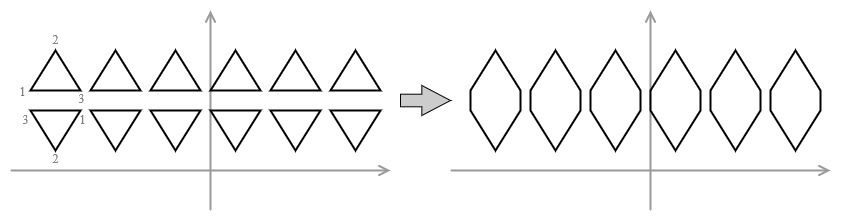

Рисунок 4 — Альтернативный пример склейки полигонов

* генерации `count_2D()` параметры: `(start1, start2)`, `[(step1, step2)]`, результаты: `(start1, start2)`, `(start1+step1, start2+step2)`, `(start1+2*step1, start2+2*step2)`;

* склейки полигонов в одну последовательность полигонов из нескольких последовательностей `zip_tuple(iterator1, iterator2)`. Пример:

    ```zip_tuple([(1,1),  (2,2), (3,3), (4,4)], [(2,2), (3,3), (4,4), (5,5)], [(3,3), (4,4), (5,5), (6,6)])``` →

    ```((1,1),  (2,2), (3,3)), ((2,2), (3,3) (4,4)), ((3,3), (4,4), (5,5)), ((5,5), (6,6), (7,7))```.

<font color="Crimson">**3 пункта — сложность 1**